In [ ]:
# Download data from Chicago data portal to local directory
# https://data.cityofchicago.org/api/views/85ca-t3if/rows.csv?accessType=DOWNLOAD

In [23]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Load and Clean Data

In [25]:
crash_df = pd.read_csv("Traffic_Crashes_-_Crashes.csv", low_memory=False)
crash_df.columns
crash_df.info()
crash_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671930 entries, 0 to 671929
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                671930 non-null  object 
 1   RD_NO                          667666 non-null  object 
 2   CRASH_DATE_EST_I               50901 non-null   object 
 3   CRASH_DATE                     671930 non-null  object 
 4   POSTED_SPEED_LIMIT             671930 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         671930 non-null  object 
 6   DEVICE_CONDITION               671930 non-null  object 
 7   WEATHER_CONDITION              671930 non-null  object 
 8   LIGHTING_CONDITION             671930 non-null  object 
 9   FIRST_CRASH_TYPE               671930 non-null  object 
 10  TRAFFICWAY_TYPE                671930 non-null  object 
 11  LANE_CNT                       198994 non-null  float64
 12  ALIGNMENT                     

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,671930.000000,1.989940e+05,671930.000000,671925.000000,671930.000000,670485.000000,670485.000000,670485.000000,670485.000000,670485.000000,670485.000000,670485.0,671930.000000,671930.000000,671930.000000,667711.000000,667711.000000
mean,28.364005,1.333096e+01,3681.078191,1238.857651,2.034614,0.185440,0.001163,0.019984,0.104509,0.059784,2.008303,0.0,13.217045,4.125839,6.732672,41.854501,-87.673356
std,6.280226,2.961713e+03,2899.224194,705.441803,0.451617,0.558601,0.037105,0.165024,0.416132,0.314391,1.158887,0.0,5.551338,1.980577,3.373278,0.331254,0.672656
min,0.000000,0.000000e+00,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193
25%,30.000000,2.000000e+00,1232.000000,712.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.781228,-87.721426
50%,30.000000,2.000000e+00,3200.000000,1135.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874517,-87.673664
75%,30.000000,4.000000e+00,5600.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.924021,-87.632995
max,99.000000,1.191625e+06,451100.000000,6100.000000,18.000000,21.000000,4.000000,7.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


In [26]:
# drop columns that are not useful for analysis
crash_df.drop(["CRASH_RECORD_ID", "RD_NO", "CRASH_DATE_EST_I", "CRASH_DATE", "LANE_CNT", 
               "REPORT_TYPE", "INTERSECTION_RELATED_I", "NOT_RIGHT_OF_WAY_I", "HIT_AND_RUN_I", 
               "DATE_POLICE_NOTIFIED", "BEAT_OF_OCCURRENCE", "PHOTOS_TAKEN_I", "STATEMENTS_TAKEN_I", 
               "DOORING_I", "WORK_ZONE_I", "WORK_ZONE_TYPE", "WORKERS_PRESENT_I", "NUM_UNITS"], axis=1, 
              inplace=True)
crash_df.shape, crash_df.columns
crash_df.dropna(axis=0, how="any", inplace=True)
crash_df.shape

(666264, 31)

In [27]:
# checking GPS data
lon_max = crash_df.LONGITUDE.max()
lon_min = crash_df.LONGITUDE.min()
lat_max = crash_df.LATITUDE.max()
lat_min = crash_df.LATITUDE.min()

lon_max, lon_min, lat_max, lat_min

crash_df = crash_df[crash_df.LONGITUDE != 0.0]
crash_df = crash_df[crash_df.LATITUDE != 0.0]
crash_df.shape

(666225, 31)

In [30]:
# Lets encode our target labels
le = preprocessing.LabelEncoder()
crash_df.DAMAGE = le.fit_transform(crash_df.DAMAGE)
crash_df.DAMAGE.value_counts()

2    402191
1    184994
0     79040
Name: DAMAGE, dtype: int64

In [31]:
# change crash_df.DAMAGE to -1 if 0 or 1 and 1 if 2
crash_df.DAMAGE = crash_df.DAMAGE.apply(lambda x: -1 if x < 2 else 1)
crash_df.DAMAGE.value_counts()
# Damage is now encoded as -1 for less than $1500 and 1 for more than $1500

 1    402191
-1    264034
Name: DAMAGE, dtype: int64

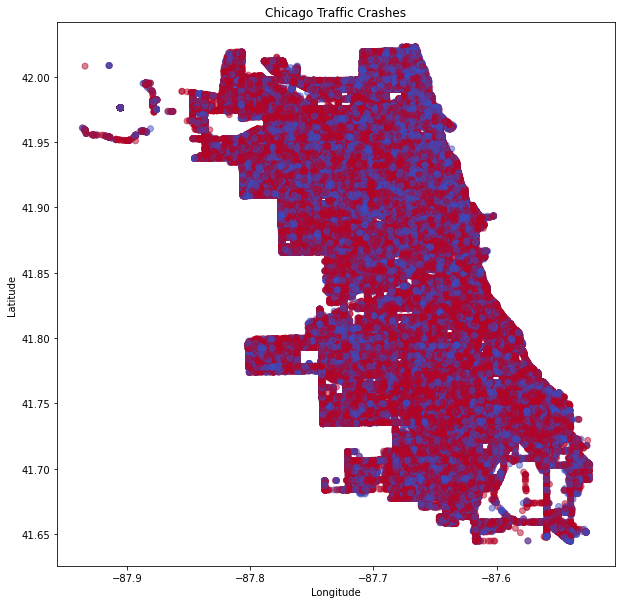

In [32]:
y = crash_df.DAMAGE
X = crash_df.drop("DAMAGE", axis=1)
X.shape, y.shape
# remove all columns not LATITUDE or LONGITUDE
X = X[["LATITUDE", "LONGITUDE"]]
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# plot the data
plt.figure(figsize=(10, 10))
plt.scatter(X_train.LONGITUDE, X_train.LATITUDE, c=y_train, cmap="coolwarm", alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Chicago Traffic Crashes")
plt.show()

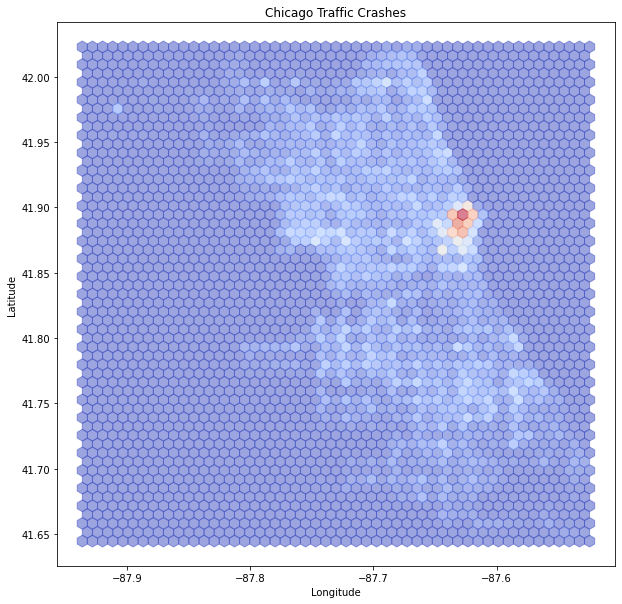

In [33]:
plt.figure(figsize=(10, 10))
plt.hexbin(X_train.LONGITUDE, X_train.LATITUDE, gridsize=50, cmap="coolwarm", alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Chicago Traffic Crashes")
plt.show()